In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv(r"C:\Users\Gaurav\OneDrive\Desktop\codsoft2\EDA\iris_cleaned.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
x=df.drop(columns=['species'],axis=1)
y=df["species"]

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [7]:
x_train.size

448

In [8]:
x_train.shape

(112, 4)

In [9]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

<Axes: >

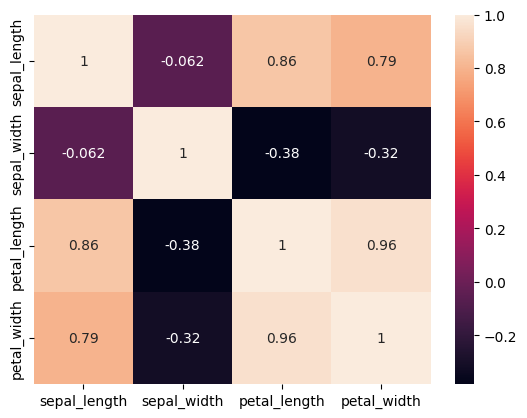

In [11]:
sns.heatmap(x_train.corr(),annot=True)

Text(0.5, 1.0, 'x_train after scaling')

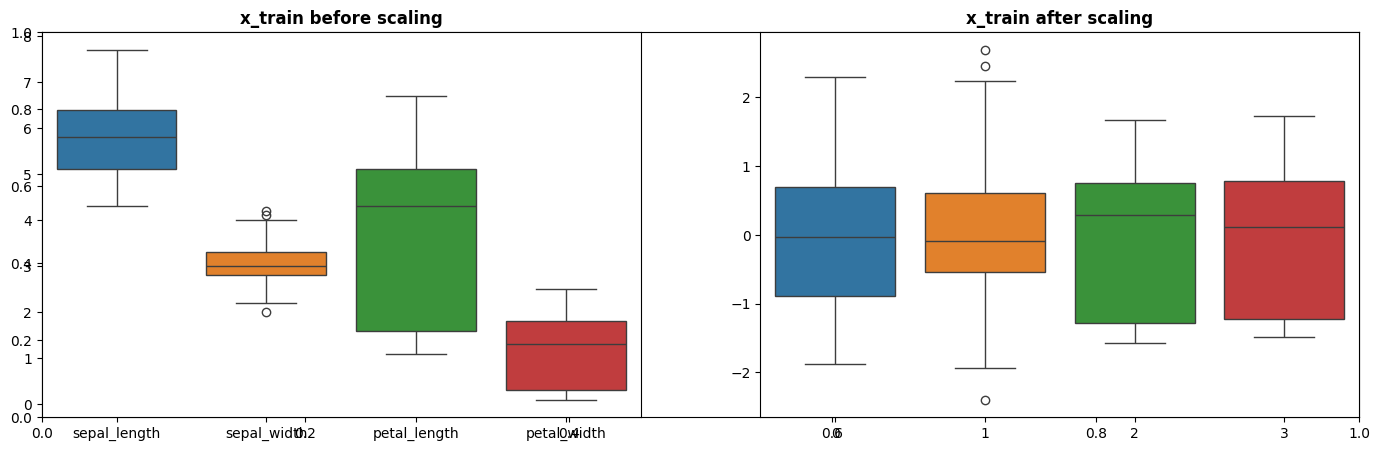

In [12]:
plt.subplots(figsize=(17,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("x_train before scaling",weight="bold")
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title("x_train after scaling",weight="bold")

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score,classification_report

In [14]:
log=LogisticRegression()
log.fit(x_train_scaled,y_train)

LogisticRegression()

In [15]:
y_pred=log.predict(x_test_scaled)

In [16]:
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)

In [17]:
print('Accuracy:',accuracy)
print("classification_report")
print(report)

Accuracy: 0.9736842105263158
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [18]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(log,open('logistic.pkl','wb'))